# [Live Coding 🦊] Que vaudra le Bitcoin en 2024 ?

Hello,

Je te propose que l'on code ensemble en direct un programme en Python 🐍 pour prédire les valeurs du Bitcoin 💰en 2024 grâce au Machine Learning (Intelligence Artificielle), en se basant sur ses précédentes valeurs.

➡️Si tu ne sais pas coder Python 🤷‍♂️: tu peux suivre le live pour interpréter les résultats avec moi 📈

➡️Si tu sais coder en Python 🧑‍💻: tu pourras suivre "step by step" la création de ce programme en le développant sur ta machine en direct et l'enrichir après ce live 🚀

Nous finirons ce live par un échange afin de débattre sur la fiabilité de cette prédiction.

PS : j'ai créé cet évènement à des fins pédagogiques et je ne serai en aucun cas tenu responsable d'éventuels achats de Bitcoins basés sur les prédictions que nous allons faire ensemble 😁.

A bientôt

Anthony 🦊
14/12/2023

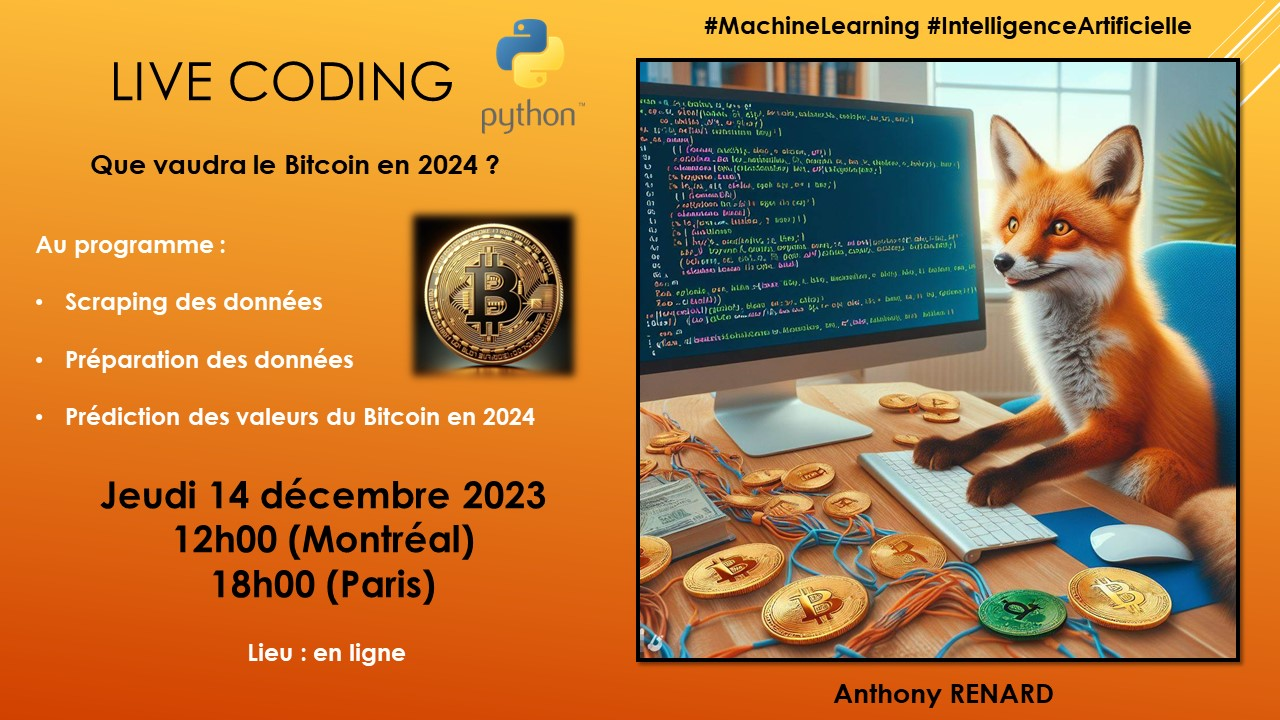

In [1]:
from IPython.display import Image

image_path = 'C:/Users/Utilisateur/TESTS/bitcoin/bitcoinlive/live_coding.JPG'

Image(filename=image_path, width=1100, height=1100)

In [2]:
#Importation des librairies utiles
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf #https://pypi.org/project/yfinance
from prophet import Prophet #https://facebook.github.io/prophet/
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly
from sklearn.model_selection import train_test_split

C:\Users\Utilisateur\anaconda3\envs\TEST4\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Vérification de la version de Python
import sys
print(sys.version)


3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]


# 1. Scrapping de l'évolution de la valeur du Bitcoin en fonction du temps

In [4]:
#scapping des données :  Download market data from Yahoo! Finance's API : https://pypi.org/project/yfinance
df_BTC_EUR=yf.download("BTC-EUR",start="2021-01-01", end="2023-12-14")
df_BTC_EUR.reset_index(inplace=True) #Permet de considérer la colonne date comme une simple colonne et non plus un index
df_BTC_EUR

[*********************100%%**********************]  1 of 1 completed


Date          Open          High           Low         Close  \
0    2021-01-01  23735.423828  24316.916016  23649.960938  24165.556641   
1    2021-01-02  24167.451172  27321.906250  23972.966797  26474.892578   
2    2021-01-03  26476.656250  28519.630859  26413.128906  26760.720703   
3    2021-01-04  26784.332031  27294.240234  23363.980469  26094.005859   
4    2021-01-05  26098.189453  28009.367188  24633.167969  27639.482422   
...         ...           ...           ...           ...           ...   
1072 2023-12-09  40123.339844  41539.382812  39986.851562  40995.437500   
1073 2023-12-10  41007.894531  41176.117188  40495.136719  40586.460938   
1074 2023-12-11  40588.683594  40909.796875  40495.066406  40666.917969   
1075 2023-12-12  40678.363281  40690.398438  37380.941406  38311.312500   
1076 2023-12-13  38306.578125  38979.156250  37697.570312  38385.144531   

         Adj Close       Volume  
0     24165.556641  33508045052  
1     26474.892578  55925382232  
2     26760.720703  64216240796  
3     26094.005859  66241895056  
4     27639.482422  54923202611  
...            ...          ...  
1072  40995.437500  22667680509  
1073  40586.460938  16121172681  
1074  40666.917969  12076134189  
1075  38311.312500  37743607791  
1076  38385.144531  22947173736  

[1077 rows x 7 columns]

In [5]:
#Selection des 2 colonnes qui nous intéresse
df_BTC_EUR_DC = df_BTC_EUR[['Date','Close']]
df_BTC_EUR_DC

Date         Close
0    2021-01-01  24165.556641
1    2021-01-02  26474.892578
2    2021-01-03  26760.720703
3    2021-01-04  26094.005859
4    2021-01-05  27639.482422
...         ...           ...
1072 2023-12-09  40995.437500
1073 2023-12-10  40586.460938
1074 2023-12-11  40666.917969
1075 2023-12-12  38311.312500
1076 2023-12-13  38385.144531

[1077 rows x 2 columns]

Text(0, 0.5, 'Valeur du Bitcoin en Euros')

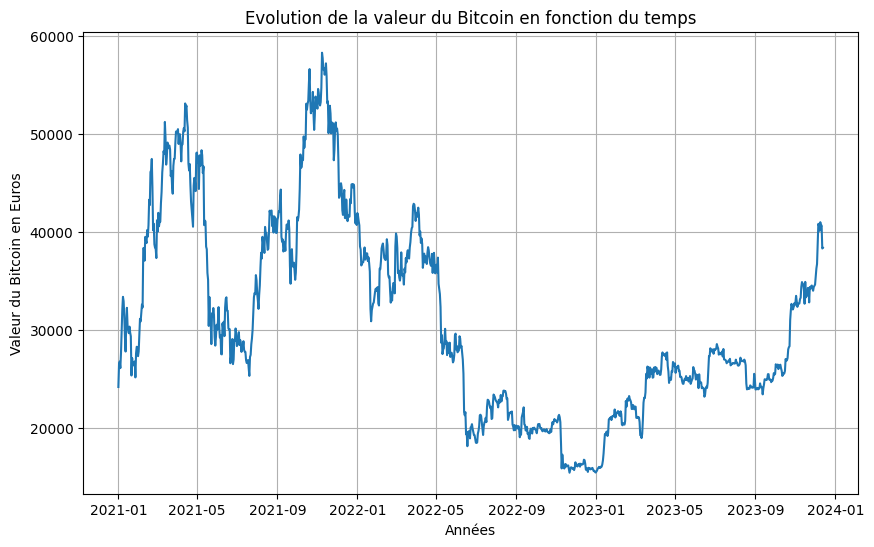

In [6]:
# Affichage du graphique des valeurs de clôture
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.grid(True)
sns.lineplot(data=df_BTC_EUR_DC, x='Date', y='Close', ax=ax)
ax.set_title('Evolution de la valeur du Bitcoin en fonction du temps')
ax.set_xlabel('Années')
ax.set_ylabel('Valeur du Bitcoin en Euros')

# 2. Prédiction de la valeur du BITCOIN dans le futur

## 2.1 Préparation des données

In [7]:
#Nommination des colonnes dans la règle exigé par le modèle Prophet
df_BTC_EUR_DC.columns=['ds', 'y']
df_BTC_EUR_DC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1077 non-null   datetime64[ns]
 1   y       1077 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.0 KB


In [8]:
#Séparation des données en jeux d'entrainement et jeux de test\n",
df_BTC_EUR_DC_train, df_BTC_EUR_DC_test = train_test_split(df_BTC_EUR_DC, test_size=0.2, shuffle=False,  random_state=55)
#Shuffle = False car ici il ne faux pas mélanger les lignes des Dataframes car nous devons conserver la chronologie",

In [9]:
#Affichage des dataframes d'entrainement et de test
print("Fin de df_BTC_EUR_DC_train")
display(df_BTC_EUR_DC_train.tail())
print("Début de df_BTC_EUR_DC_test")
display(df_BTC_EUR_DC_test.head())
print("Ici on peut vérifier que nos 2 Dataframes se suivent bien en termes de dates")

Fin de df_BTC_EUR_DC_train


ds             y
856 2023-05-07  25783.212891
857 2023-05-08  25825.054688
858 2023-05-09  25183.925781
859 2023-05-10  25225.355469
860 2023-05-11  25150.437500

Début de df_BTC_EUR_DC_test


ds             y
861 2023-05-12  24743.683594
862 2023-05-13  24502.441406
863 2023-05-14  24488.308594
864 2023-05-15  24813.755859
865 2023-05-16  25008.222656

Ici on peut vérifier que nos 2 Dataframes se suivent bien en termes de dates


## 2.2 Création et entrainement du modèle

In [10]:
model_BTC_EUR = Prophet() #Chargement du modèle
model_BTC_EUR.fit(df_BTC_EUR_DC_train) #Entrainement du modèle avec le jeu d'entrainement

16:42:06 - cmdstanpy - INFO - Chain [1] start processing
16:42:06 - cmdstanpy - INFO - Chain [1] done processing


## 2.3 Prédiction

In [11]:
future = model_BTC_EUR.make_future_dataframe(periods=365*2, freq="B") # définition de la plage prédiction sur 2 ans
df_prediction=model_BTC_EUR.predict(future) #prédiction
df_prediction

ds         trend     yhat_lower     yhat_upper    trend_lower  \
0    2021-01-01  29188.901876   25838.810427   32334.288416   29188.901876   
1    2021-01-02  29299.956026   26272.851478   32410.006687   29299.956026   
2    2021-01-03  29411.010176   26250.226355   32689.399719   29411.010176   
3    2021-01-04  29522.064326   26633.558373   32788.598332   29522.064326   
4    2021-01-05  29633.118477   26412.490257   33049.185996   29633.118477   
...         ...           ...            ...            ...            ...   
1586 2026-02-20  33535.518711 -133871.360526  209867.926246 -139488.882167   
1587 2026-02-23  33579.861541 -133581.642339  211895.589833 -140000.604208   
1588 2026-02-24  33594.642484 -136221.141176  211593.627463 -140541.888136   
1589 2026-02-25  33609.423427 -136919.483549  213192.734019 -141083.172064   
1590 2026-02-26  33624.204370 -136846.825751  212019.690444 -141624.455991   

        trend_upper  additive_terms  additive_terms_lower  \
0      29188.901876       26.679910             26.679910   
1      29299.956026       94.044546             94.044546   
2      29411.010176      155.594560            155.594560   
3      29522.064326      198.312967            198.312967   
4      29633.118477      148.010932            148.010932   
...             ...             ...                   ...   
1586  205401.338109     5068.033746           5068.033746   
1587  205671.272502     5082.230908           5082.230908   
1588  205911.645008     4982.264085           4982.264085   
1589  206152.017514     5025.614778           5025.614778   
1590  206389.481899     4839.312586           4839.312586   

      additive_terms_upper     weekly  weekly_lower  weekly_upper  \
0                26.679910 -59.968158    -59.968158    -59.968158   
1                94.044546 -37.868076    -37.868076    -37.868076   
2               155.594560  -4.629882     -4.629882     -4.629882   
3               198.312967  28.325699     28.325699     28.325699   
4               148.010932 -12.096433    -12.096433    -12.096433   
...                    ...        ...           ...           ...   
1586           5068.033746 -59.968158    -59.968158    -59.968158   
1587           5082.230908  28.325699     28.325699     28.325699   
1588           4982.264085 -12.096433    -12.096433    -12.096433   
1589           5025.614778  99.979468     99.979468     99.979468   
1590           4839.312586 -13.742618    -13.742618    -13.742618   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0       86.648068     86.648068     86.648068                   0.0   
1      131.912621    131.912621    131.912621                   0.0   
2      160.224442    160.224442    160.224442                   0.0   
3      169.987268    169.987268    169.987268                   0.0   
4      160.107365    160.107365    160.107365                   0.0   
...           ...           ...           ...                   ...   
1586  5128.001904   5128.001904   5128.001904                   0.0   
1587  5053.905209   5053.905209   5053.905209                   0.0   
1588  4994.360518   4994.360518   4994.360518                   0.0   
1589  4925.635310   4925.635310   4925.635310                   0.0   
1590  4853.055204   4853.055204   4853.055204                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                            0.0                         0.0  29215.581785  
1                            0.0                         0.0  29394.000571  
2                            0.0                         0.0  29566.604736  
3                            0.0                         0.0  29720.377294  
4                            0.0                         0.0  29781.129408  
...                          ...                         ...           ...  
1586                         0.0                         0.0  38603.552457  
1587                         0.0             

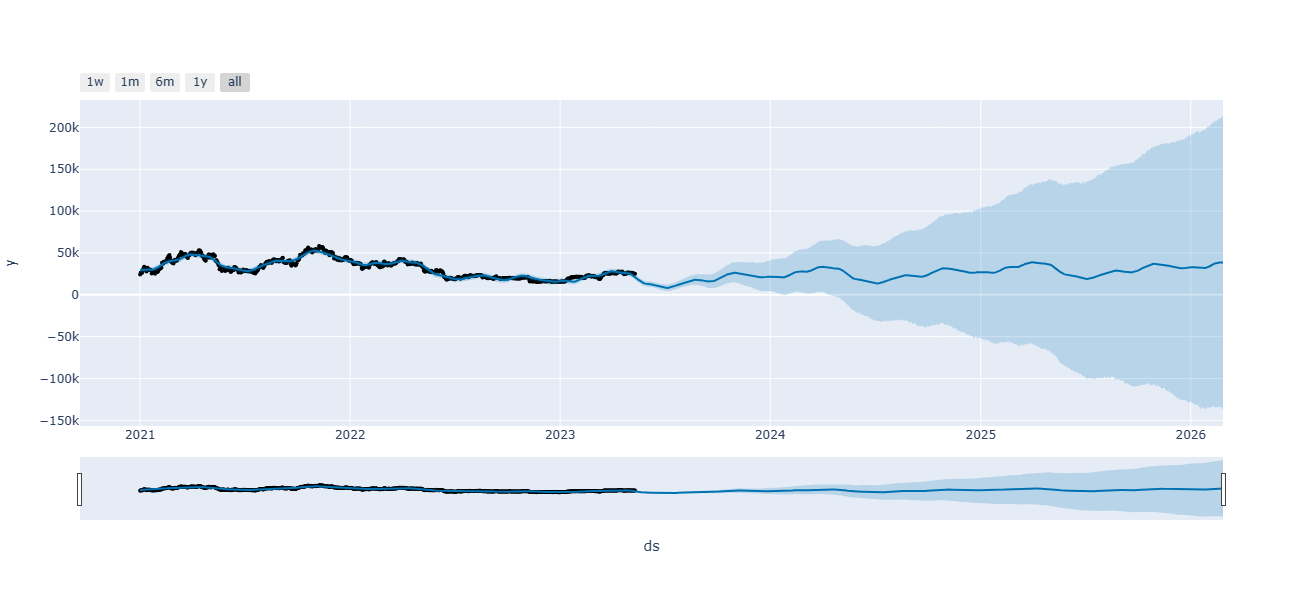

In [12]:
# Affichage des data d'entrainement en noir et de prédiction en bleu
plot_plotly(model_BTC_EUR, df_prediction)

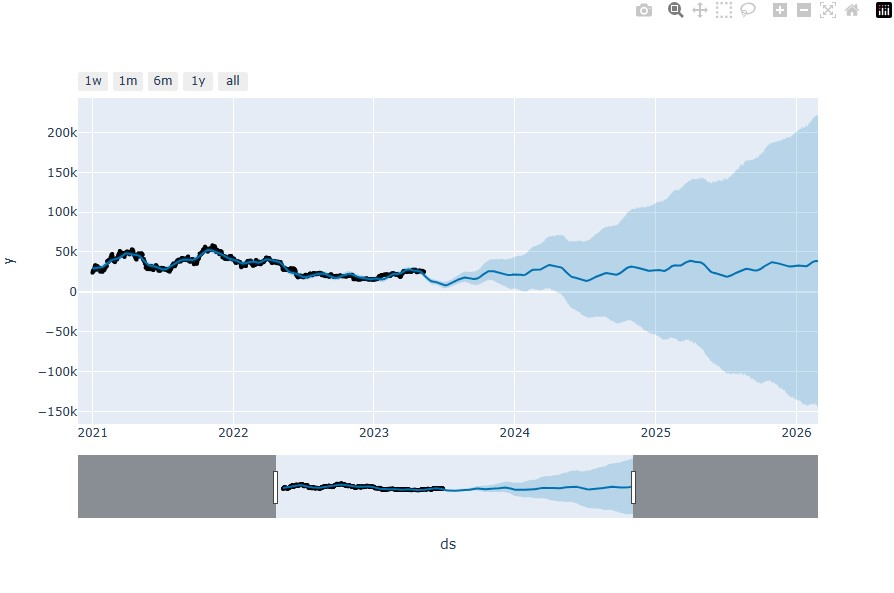

In [13]:
image_path = 'C:/Users/Utilisateur/TESTS/bitcoin/plot.jpg'
Image(filename=image_path, width=600, height=600)

[[<matplotlib.lines.Line2D at 0x1b63252a9d0>],

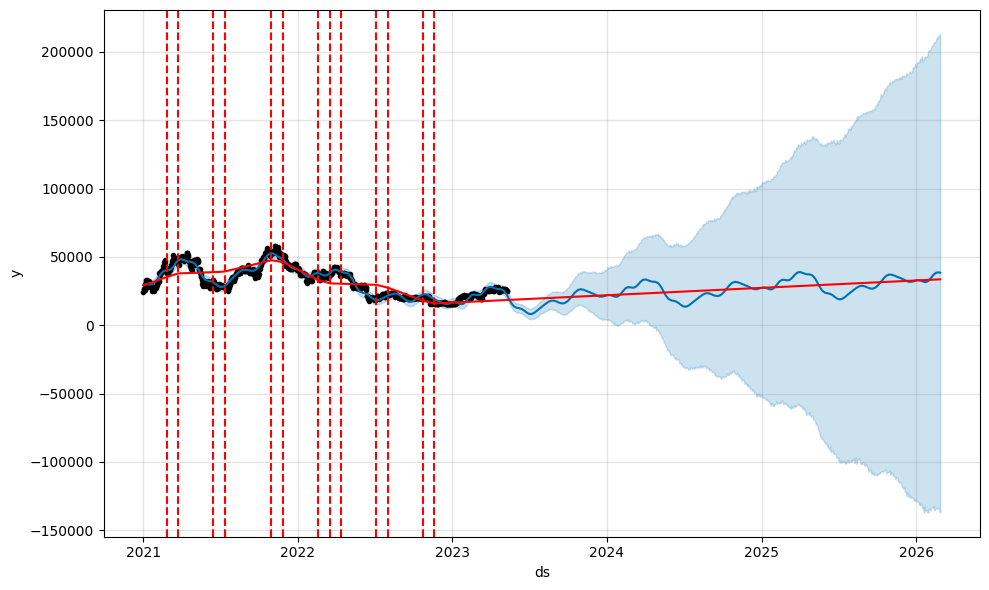

In [14]:
#Mise en valeur des changepoints (changement de direction des tendances)

from prophet.plot import add_changepoints_to_plot
figure=model_BTC_EUR.plot(df_prediction)
add_changepoints_to_plot(figure.gca(), model_BTC_EUR,df_prediction)

# FIN  [Live Coding 🦊] Que vaudra le Bitcoin en 2024 ?